* **LGM** - **TASK 1** - **Iris Flower Classification**


Importing the modules 
**sklearn** - Python module for data science applications 
**seaborn** - For visualization 
**numpy** - Stands for numerical python. It makes easier to work with N-dimensional array and has wide range of mathematical funtions. 
**KNeighborsClassifier** - method for classifying using the K-Nearest Neighbor 

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np

Loading the data set from sklearn load_iris and analysis of data and its attributes


In [ ]:
iris_data = load_iris()
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Displaying the classes in dataset i.e setosa, vercolor, verginica and attributes of iri_flower





In [ ]:
print(f"Target: {iris_data['target_names']}")
print(f"Features: {iris_data['feature_names']}")
print(f"Shape: {iris_data['data'].shape}")

Target: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape: (150, 4)


Displaying data

In [ ]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Visualizing the data: Setosa is having less distribution of petal length and width. Versicolor is distributed in average manner in case of petal length and width. Virginica is highly distributed with large no. in case of sepal length & width. 

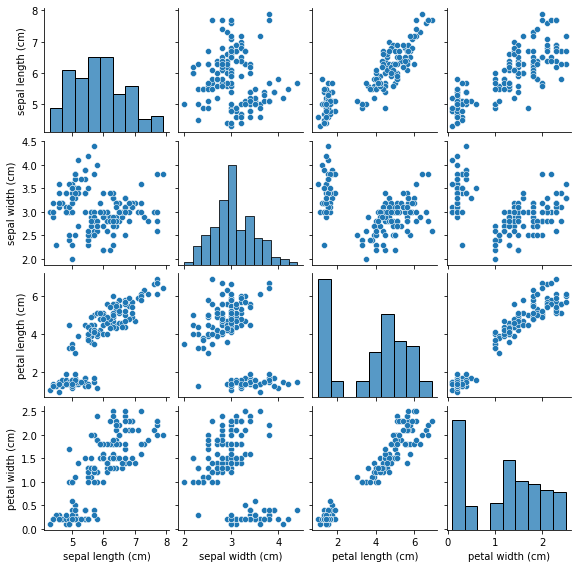

In [ ]:
sns.pairplot(df,height = 2)

Displaying the data in the form of array. 0 represents setosa, 1 represents vericolor and 2 represents virginica.

In [ ]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Building model

train_test_split is a function in sklearn model selection for splitting data arrays into two subsets. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris_data['data'],iris_data['target'],random_state=0)
print(f"Shape of training data: {x_train.shape},{y_train.shape}")
print(f"Shape of testing data: {x_test.shape},{y_test.shape}")


Shape of training data: (112, 4),(112,)
Shape of testing data: (38, 4),(38,)


This classifier implements learning based on the k nearest neighbors. The choice of the value of k is dependent on data. In this case K = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Testing the model 

Predicting the species

In [ ]:
x_new = np.array([[3.4,5,5.3,5.9]])
print(x_new.shape)

(1, 4)


In [ ]:
predict_iris = knn.predict(x_new)
print(iris_data['target_names'][predict_iris])

['virginica']


Measuring the model 

In [ ]:
y_pred = knn.predict(x_test)
print(np.mean(y_pred == y_test))
print(f"Accuracy is {round(knn.score(x_test,y_test)*100,2)}%")

0.9736842105263158
Accuracy is 97.37%
